# K-cluster Algorithm Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/kurtson/Desktop/House Sales'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'cleaned_home.csv'), index_col = False)

### Data Cleaning

In [5]:
df.shape

(21613, 18)

In [6]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [7]:
#Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

### Find the Elbow

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/kurtson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kurtson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kurtson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kurtson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

[-2950036430717774.0,
 -1392070256496531.0,
 -767158449013988.9,
 -497554157075931.06,
 -360871479292018.6,
 -274264948714812.38,
 -215823184772101.25,
 -172777938413580.22,
 -146931092611933.94]

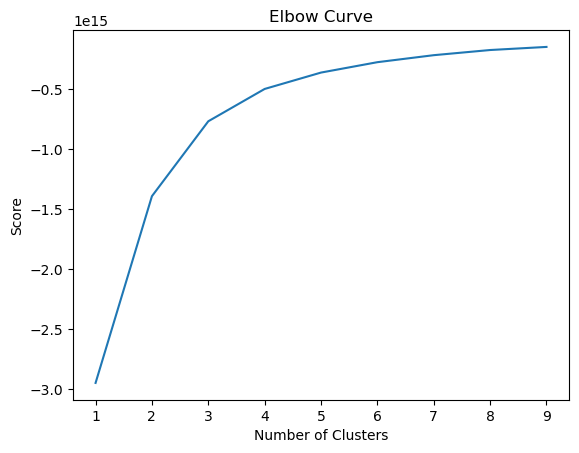

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### after four is where the line begins to straighten out

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_init = 10) 


In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4, n_init=10)

In [13]:
df['clusters'] = kmeans.fit_predict(df)

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,3
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,3
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,0


In [15]:
df['clusters'].value_counts()

clusters
0    12934
3     7260
1     1229
2      190
Name: count, dtype: int64

In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,3
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,3
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,0


### price versus sqft_living

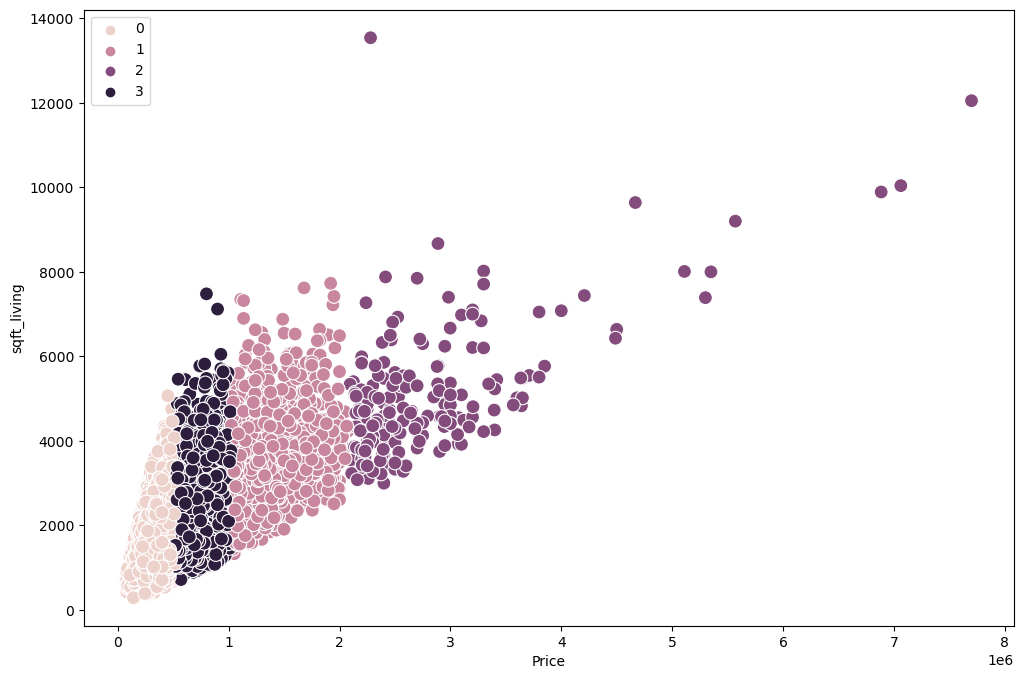

In [17]:
# Plot the clusters for the "price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['sqft_living'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('sqft_living') # Label y-axis.
plt.show()

### Price vs. sqft_lot

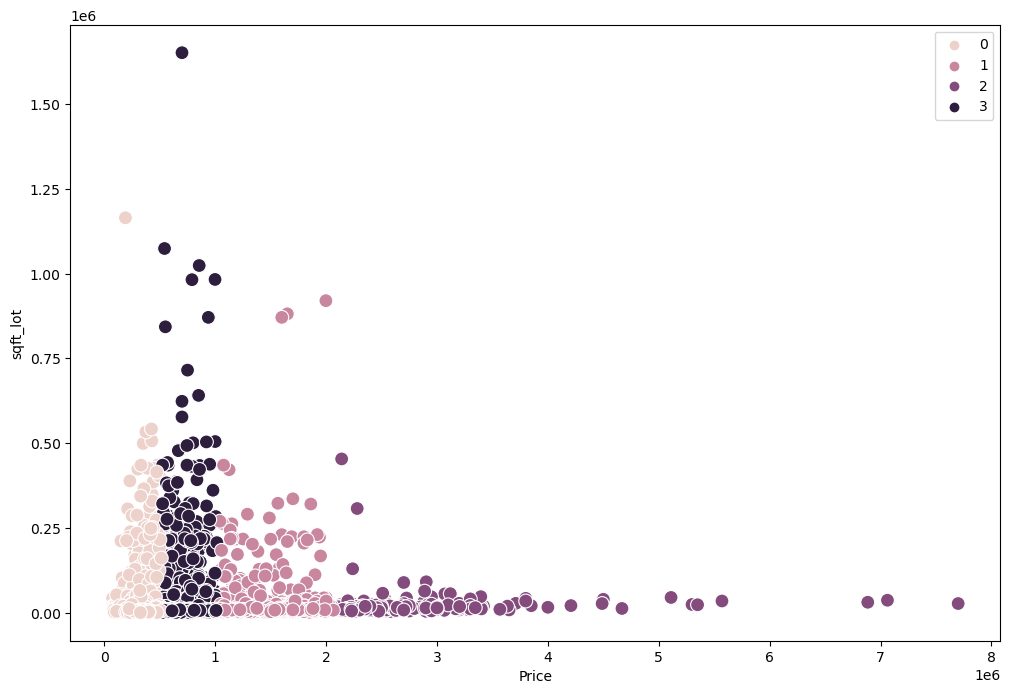

In [18]:
# Plot the clusters for the "price" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['sqft_lot'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('sqft_lot') # Label y-axis.
plt.show()

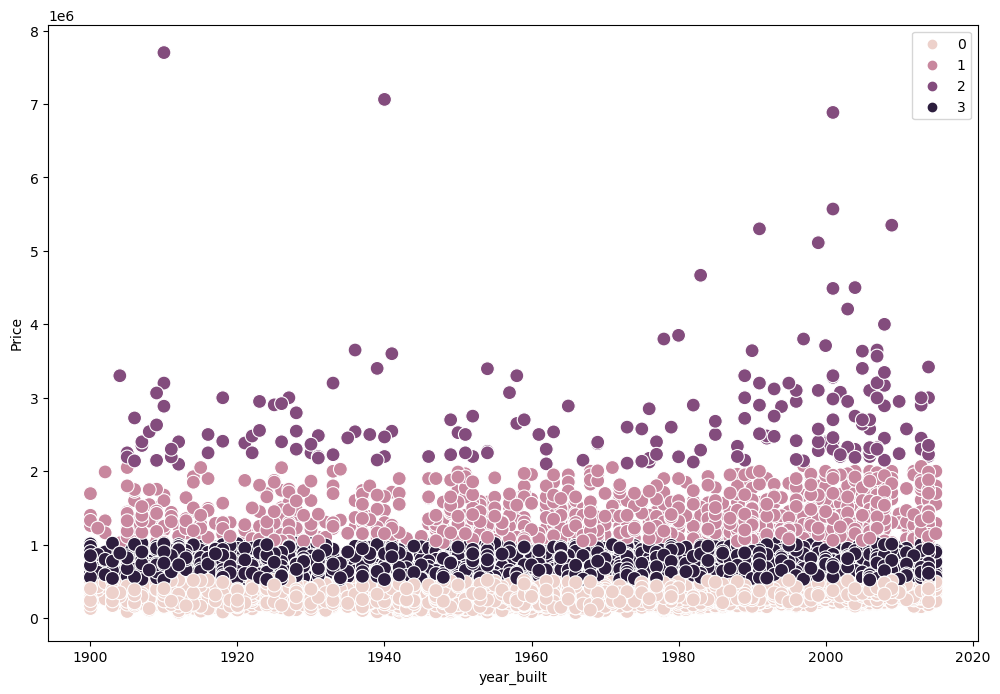

In [19]:
# Plot the clusters for the "price" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year_built'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year_built') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [20]:
#rename clusters
df.loc[df['clusters'] == 3, 'clusters'] = 'dark purple'
df.loc[df['clusters'] == 2, 'clusters'] = 'purple'
df.loc[df['clusters'] == 1, 'clusters'] = 'rose'
df.loc[df['clusters'] == 0, 'clusters'] = 'pink'

### Key Insights
- the clusters with price and sqft_living make plenty of sense as there is a clear positive relationship.

- the clusters with price and sqft_loft have no linear connection that is relevant.

- the clusters with price and year_built represent a simple example of showing that newer homes are likely going to cost more in king county.


## Descriptive Statistics

In [21]:
df.groupby('clusters').agg({'price':['mean', 'median'], 
                         'sqft_living':['mean', 'median'], 
                         'sqft_lot':['mean', 'median'],
                          'year_built':['mean', 'median']})

price             sqft_living              sqft_lot  \
                     mean     median         mean  median          mean   
clusters                                                                  
dark purple  6.893052e+05   660000.0  2455.921350  2400.0  18934.149587   
pink         3.452453e+05   345000.0  1677.070203  1600.0  12051.875445   
purple       2.806109e+06  2528500.0  5094.152632  4730.0  23010.052632   
rose         1.358833e+06  1295000.0  3632.033360  3530.0  23428.882832   

                       year_built          
              median         mean  median  
clusters                                   
dark purple   7452.5  1971.456198  1978.0  
pink          7500.0  1970.327122  1970.0  
purple       15972.0  1972.257895  1986.5  
rose         10361.0  1975.282343  1985.0

## Results

- These results are incredibly helpful insight into answering some of the major questions. They do indicate that the more sqft_living space, typically the pricier the home is going to be.

- We also learned that the oldest houses are likely going to be on the cheaper end while newer homes are going to be pricier, helping prove our hypothesis.

In [22]:
#Export df
df.to_csv(os.path.join(path, 'Prepared Data', 'cleaned_home_cluster.csv'))